In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

<h2>Simple Regression Dataset - Straight Line</h2>

Input Feature: X  

Target: 5*X + 8 + some noise

Objective: Train a model to predict target for a given X

In [2]:
# Straight Line Function
def straight_line(x):
    return 5*x + 8

In [3]:
straight_line(25)

133

In [4]:
straight_line(1.254)

14.27

In [5]:
np.random.seed(5)

samples = 150
x = pd.Series(np.arange(0,150))
y = x.map(straight_line) + np.random.randn(samples)*10

In [6]:
df = pd.DataFrame({'x':x,'y':y})

In [7]:
df.head()

,x,y
0,0,12.412275
1,1,9.691298
2,2,42.307712
3,3,20.479079
4,4,29.096098


In [8]:
# Correlation will indicate how strongly features are related to the output
df.corr()

,x,y
x,1.000000,0.998871
y,0.998871,1.000000


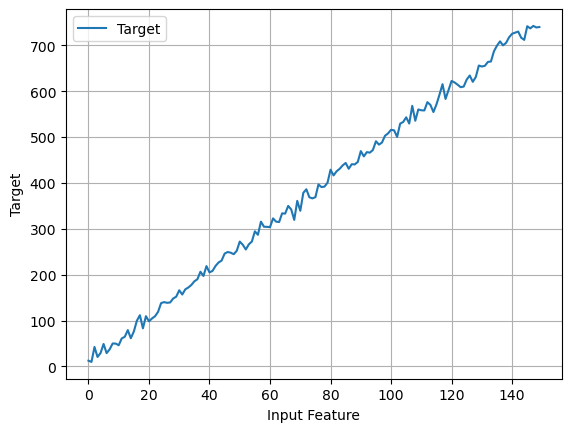

In [9]:
plt.plot(df.x,df.y,label='Target')
plt.grid(True)
plt.xlabel('Input Feature')
plt.ylabel('Target')
plt.legend()
plt.show()

In [10]:
# Save all data
df.to_csv('linear_all.csv',index=False,
          columns=['x','y'])

<h2>SageMaker Convention for Training and Validation files</h2>

CSV File Column order: y_noisy, x

Training, Validation files do not have a column header

In [11]:
# Training = 70% of the data
# Validation = 30% of the data
# Randomize the datset
np.random.seed(5)
l = list(df.index)
np.random.shuffle(l)
df = df.iloc[l]

In [12]:
df.head()

,x,y
82,82,425.457270
134,134,687.275162
114,114,554.643782
42,42,219.007382
109,109,560.269533


In [13]:
rows = df.shape[0]
train = int(.7 * rows)
test = rows - train

In [14]:
print(rows, train, test)

150 105 45


In [15]:
# Write Training Set
df[:train].to_csv('linear_train.csv',index=False,header=False,columns=['y','x'])

In [16]:
# Write Validation Set
df[train:].to_csv('linear_validation.csv',index=False,header=False,columns=['y','x'])